# importing the dependencies

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier  
import warnings
warnings.filterwarnings("ignore")


# data collection

In [4]:
#loading the dataset
df = pd.read_csv('/Users/shreyasingh/Downloads/winequality.csv')

In [5]:
#no of rows and columns
df.shape

(1599, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
# missing value
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
# data analysis and visualization
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


/var/folders/f9/_4mkkcf11bsbsmzmgybr1twr0000gn/T/ipykernel_4073/4024656766.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='quality', data = df, kind ='count', palette='Set2')


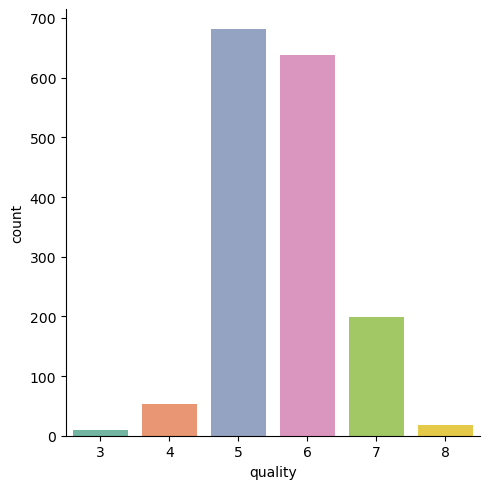

In [9]:
# number of values for each quality
sns.catplot(x='quality', data = df, kind ='count', palette='Set2')

/var/folders/f9/_4mkkcf11bsbsmzmgybr1twr0000gn/T/ipykernel_4073/1390669383.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='quality', y= 'volatile acidity', data=df, palette='Set2')


<Axes: xlabel='quality', ylabel='volatile acidity'>

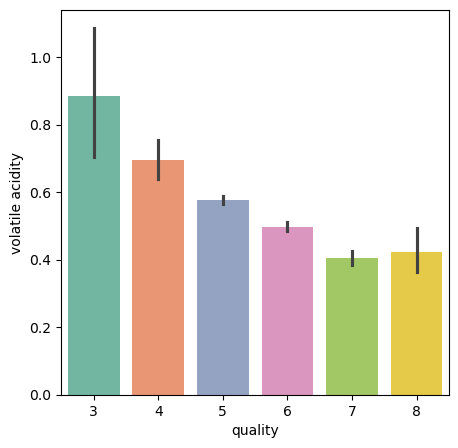

In [10]:
# volatile acidity vs quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y= 'volatile acidity', data=df, palette='Set2')

/var/folders/f9/_4mkkcf11bsbsmzmgybr1twr0000gn/T/ipykernel_4073/3464087998.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='quality', y= 'citric acid', data=df, palette='Set2')


<Axes: xlabel='quality', ylabel='citric acid'>

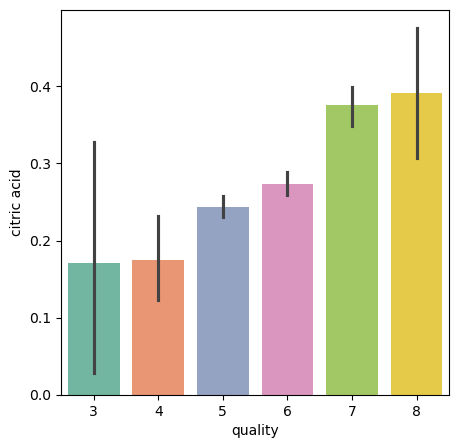

In [11]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y= 'citric acid', data=df, palette='Set2')

# correlation

In [13]:
correlation = df.corr()

<Axes: >

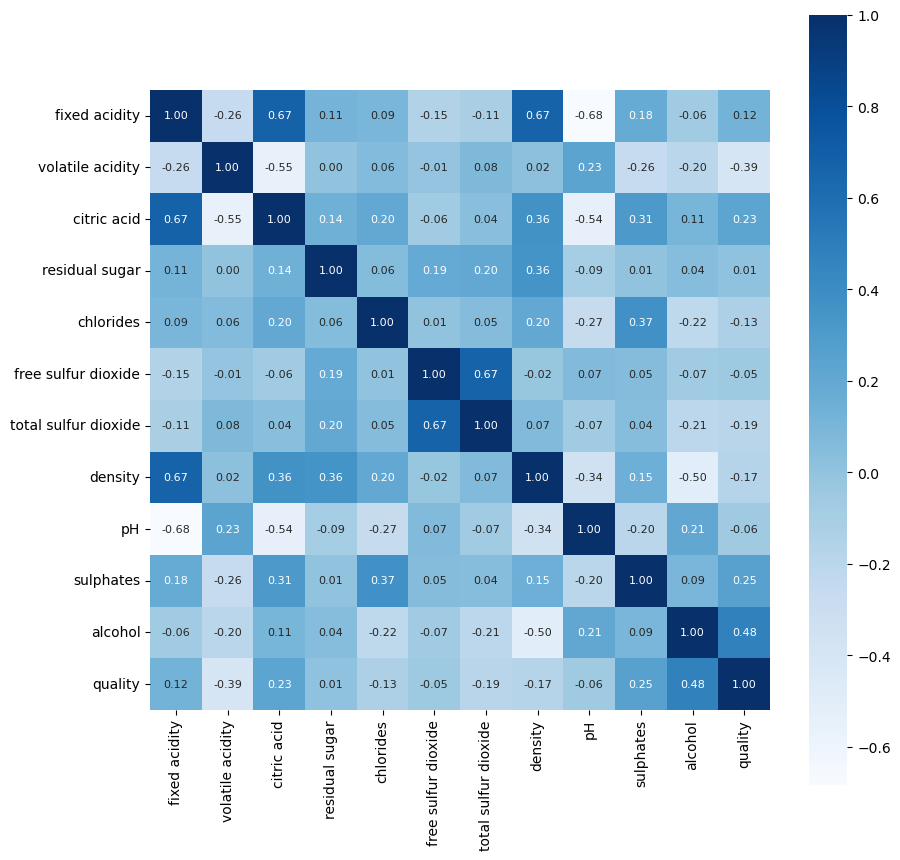

In [14]:
# constructing the heatmap
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.2f', annot=True, annot_kws={'size': 8}, cmap='Blues')  


# data pre-processing

In [16]:
# separate the data snd label
X = df.drop('quality' ,axis=1)

In [17]:
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

# label binarization

In [19]:
Y = df['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)

In [20]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


# train and test split

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [23]:
print(Y.shape, Y_train.shape, Y_test.shape)

(1599,) (1279,) (320,)


# model training

random forest classifier

In [25]:
model = RandomForestClassifier()

In [26]:
model.fit(X_train, Y_train)

RandomForestClassifier()

# Model evaluation

# accuracy score

In [29]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [30]:
print('Accuracy : ', test_data_accuracy)

Accuracy :  0.921875


# building a predictive system

In [59]:
input_data = (7.1,0.71,0,1.9,0.08,14,35,0.9972,3.47,0.55,9.4)
# changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)
# reshape the data as we are predicting the label for only one instance  
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)  

# Use the reshaped input data for prediction  
prediction = model.predict(input_data_reshaped)  
print(prediction)


if (prediction[0]==1):
    print('Good quality wine')
else:
    print('Bad quality wine')


[0]
Bad quality wine
